Question 1 : What is the fundamental idea behind ensemble techniques? How does
bagging differ from boosting in terms of approach and objective?

Answer:

- The fundamental idea behind ensemble techniques is that it combines multiple models.
- Prediction which is more stable and accurate as compared to individual models.

How bagging differs from boosting in terms of approach and objective:

Bagging is a technique that builds all the models parallely and independent of each other.
- It redues variance and prevents overfitting.

Boosting is a technique that builds all the models sequentially and dependent of each other.
- Learning from mistakes of previous models and helps improve the weaker one.


Question 2: Explain how the Random Forest Classifier reduces overfitting compared to a single decision tree. Mention the role of two key hyperparameters in this process.

Answer:

Random Forests reduce overfitting by combining the predictions of many different decision trees, each built in a different way. This ensemble approach introduces randomness in two key ways:

1) Bootstrap Aggregation (Bagging): Each tree is trained on a random subset of the data (with replacement).

2) Feature Randomness (Feature Bagging): At each split in each tree, a random subset of features is chosen to select the best split.

Key Hyperparameters in Reducing Overfitting:

1) n_estimators: This is the number of trees in the forest. More trees generally make the forest more stable and less prone to overfitting.

2) max_features: This controls how many features are randomly chosen at each split. Lower values (e.g., sqrt of total features) increase randomness and diversity among trees, which further reduces overfitting.



Question 3: What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple example use case.

Answer:

Stacking (or stacked generalization) is an ensemble learning technique where you train several different types of models (called base learners), and then use another model (called a meta-learner) to combine their predictions and produce the final output.

**Bagging:** Combines several models of the same type (e.g., decision trees) trained on random subsets of the data. Their predictions are averaged or voted.

**Boosting:** Trains models in sequence, each new model correcting errors from the last; combines them with weights.

**Stacking:** Combines different model types in parallel, and a meta-learner "learns" how best to combine their predictions for the best overall performance.

Example: If, say, the Decision Tree is good at catching certain tricky spam, and Naive Bayes is better with typical spam keywords, the meta-learner learns how to weigh these strengths for the most accurate final prediction.


Question 4: What is the OOB Score in Random Forest, and why is it useful? How does it help in model evaluation without a separate validation set?

Answer:

The OOB (Out-of-Bag) score in Random Forest is a built-in method for estimating the prediction accuracy of the model using the data points that were not used during the training of certain trees.

Why is it useful?
- No Need for Separate Validation Set
- Unbiased Estimate
- Efficient and Reliable

How it help in model evaluation without a separate validation set?

- For each data point in the training set:

  - Predict its label using only those trees for which it was “out-of-bag.”

  - Aggregate these predictions to measure accuracy (OOB score).

  - The average error or accuracy across all OOB samples serves as a reliable indicator of model performance on unseen data, similar to cross-validation.



Question 5: Compare AdaBoost and Gradient Boosting in terms of:

● How they handle errors from weak learners

● Weight adjustment mechanism

● Typical use cases

Answer:

Let's compare AdaBoost and Gradient Boosting:

1. Handling Errors from Weak Learners:

- AdaBoost: Each new weak learner focuses on the specific data points that were misclassified by previous learners. It increases the importance of those hard-to-classify points by assigning them higher weights.

- Gradient Boosting: Each new learner is trained to predict the residual errors (the differences between true labels and the current ensemble's predictions).

2. Weight Adjustment Mechanism:

- AdaBoost: Adjusts sample weights. After each round, samples misclassified by the model get higher weights, so subsequent learners focus more on them.
- Gradient Boosting: Each new learner is trained to predict the residual errors (the differences between true labels and the current ensemble's predictions).

3. Typical Use Cases:

  AdaBoost:

- Works well on simple binary classification tasks, often with "decision stumps" (shallow trees)

- Useful when noise is low and you want interpretable models

  Gradient Boosting:

- Suits complex classification and regression problems, large datasets, and cases needing flexible, generalized models

- Performs well in competitions, e.g., sales forecasting, web search ranking, credit scoring


Question 6: Why does CatBoost perform well on categorical features without requiring extensive preprocessing? Briefly explain its handling of categorical variables.

Answer:

CatBoost performs well on categorical features without requiring extensive preprocessing because it is specifically designed to handle categorical variables natively using a unique encoding method. CatBoost uses statistics-based transformations derived from the target variable.

It converts categorical features into numerical values by calculating statistics such as the mean target value for each category, but it does so carefully to avoid data leakage using ordered boosting and permutation-driven approaches


Question 7: KNN Classifier Assignment: Wine Dataset Analysis with
Optimization Task:

1. Load the Wine dataset (sklearn.datasets.load_wine()).

2. Split data into 70% train and 30% test.

3. Train a KNN classifier (default K=5) without scaling and evaluate using:

   a. Accuracy

   b. Precision, Recall, F1-Score (print classification report)

4. Apply StandardScaler, retrain KNN, and compare metrics.

5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric
(Euclidean, Manhattan).

6. Train the optimized KNN and compare results with the unscaled/scaled versions.

In [2]:
# Import modules
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# 1. Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# 2. Split data into 70% train and 30% test with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3. Train KNN classifier (K=5 default) without scaling
knn = KNeighborsClassifier()  # default n_neighbors=5
knn.fit(X_train, y_train)

# Predictions and evaluation without scaling
y_pred = knn.predict(X_test)
print("Without Scaling:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 4. Apply StandardScaler, retrain KNN and compare metrics
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier()
knn_scaled.fit(X_train_scaled, y_train)

y_pred_scaled = knn_scaled.predict(X_test_scaled)
print("With Standard Scaling:")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print("Classification Report:\n", classification_report(y_test, y_pred_scaled))

# 5. Use GridSearchCV to find best K (1 to 20) and distance metric
param_grid = {
    "n_neighbors": list(range(1, 21)),
    "metric": ["euclidean", "manhattan"]
}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters from GridSearchCV:", grid_search.best_params_)

# 6. Train optimized KNN and evaluate on test set
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test_scaled)

print("Optimized KNN Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))

# Compare results summary
print("\nSummary Comparison:")
print(f"Without Scaling Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"With Scaling Accuracy: {accuracy_score(y_test, y_pred_scaled):.4f}")
print(f"Optimized Model Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")


Without Scaling:
Accuracy: 0.7222222222222222
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.78      0.67      0.72        21
           2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54

With Standard Scaling:
Accuracy: 0.9444444444444444
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        21
           2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54

Best Parameters from GridSearchCV: {'metric': 'euclidean', 'n_neighbors': 11}
Optimized KNN 

Question 8 : PCA + KNN with Variance Analysis and Visualization
Task:

1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).

2. Apply PCA and plot the scree plot (explained variance ratio).

3. Retain 95% variance and transform the dataset.

4. Train KNN on the original data and PCA-transformed data, then compare
accuracy.

5. Visualize the first two principal components using a scatter plot (color by class).


Features shape: (569, 30)


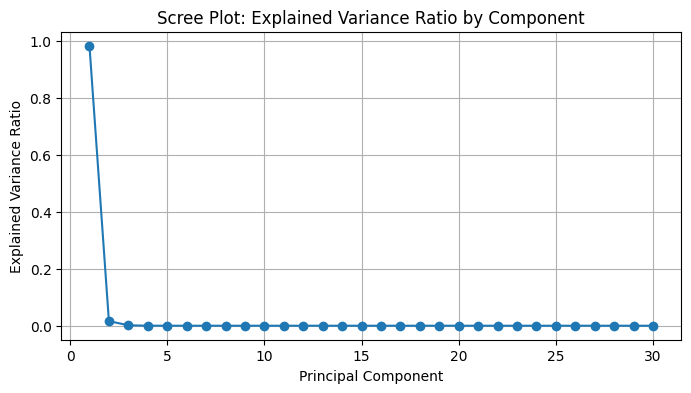

Transformed shape: (569, 1)
KNN Accuracy (Original): 0.9591
KNN Accuracy (PCA): 0.9532


In [3]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load data
data = load_breast_cancer()
X = data.data
y = data.target
print('Features shape:', X.shape)

pca = PCA()
pca.fit(X)
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8,4))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o')
plt.title('Scree Plot: Explained Variance Ratio by Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()

pca_95 = PCA(n_components=0.95)  # Retain 95% variance
X_pca = pca_95.fit_transform(X)
print('Transformed shape:', X_pca.shape)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_pca_train, X_pca_test, _, _ = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# KNN on original data
knn_orig = KNeighborsClassifier()
knn_orig.fit(X_train, y_train)
y_pred_orig = knn_orig.predict(X_test)
acc_orig = accuracy_score(y_test, y_pred_orig)

# KNN on PCA-transformed data
knn_pca = KNeighborsClassifier()
knn_pca.fit(X_pca_train, y_train)
y_pred_pca = knn_pca.predict(X_pca_test)
acc_pca = accuracy_score(y_test, y_pred_pca)

print(f'KNN Accuracy (Original): {acc_orig:.4f}')
print(f'KNN Accuracy (PCA): {acc_pca:.4f}')


Question 9:KNN Regressor with Distance Metrics and K-Value
Analysis Task:

1. Generate a synthetic regression dataset
(sklearn.datasets.make_regression(n_samples=500, n_features=10)).

2. Train a KNN regressor with:

   a. Euclidean distance (K=5)

   b. Manhattan distance (K=5)

c. Compare Mean Squared Error (MSE) for both.

3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.


MSE (Euclidean, K=5): 4697.1483
MSE (Manhattan, K=5): 5152.8778


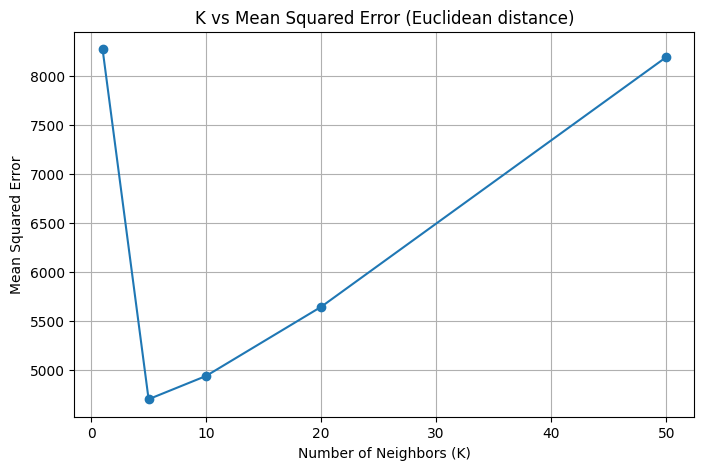

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# 1. Generate synthetic regression dataset
X, y = make_regression(n_samples=500, n_features=10, noise=5, random_state=42)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2a. KNN Regressor with Euclidean distance (default) and K=5
knn_euclid = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_euclid.fit(X_train, y_train)
y_pred_euclid = knn_euclid.predict(X_test)
mse_euclid = mean_squared_error(y_test, y_pred_euclid)

# 2b. KNN Regressor with Manhattan distance and K=5
knn_manhattan = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
mse_manhattan = mean_squared_error(y_test, y_pred_manhattan)

print(f"MSE (Euclidean, K=5): {mse_euclid:.4f}")
print(f"MSE (Manhattan, K=5): {mse_manhattan:.4f}")

# 3. Test K in {1, 5, 10, 20, 50} and plot K vs. MSE for Euclidean distance
k_values = [1, 5, 10, 20, 50]
mses = []
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mses.append(mean_squared_error(y_test, y_pred))

plt.figure(figsize=(8,5))
plt.plot(k_values, mses, marker='o')
plt.title("K vs Mean Squared Error (Euclidean distance)")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()


Question 10: KNN with KD-Tree/Ball Tree, Imputation, and Real-World
Data Task:

1. Load the Pima Indians Diabetes dataset (contains missing values).

2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.

3. Train KNN using:

   a. Brute-force method
   
   b. KD-Tree
   
   c. Ball Tree

4. Compare their training time and accuracy.

5. Plot the decision boundary for the best-performing method (use 2 most important features).

Dataset: Pima Indians Diabetes

Dataset shape: (768, 9)
Missing values (zeros):
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

=== Algorithm Comparison ===
   Algorithm  Accuracy  Training Time (s)
0      brute  0.735931           0.003601
1    kd_tree  0.735931           0.007545
2  ball_tree  0.735931           0.006919

Best Performing Algorithm: brute
Top 2 features used for visualization: ['Glucose', 'Insulin']


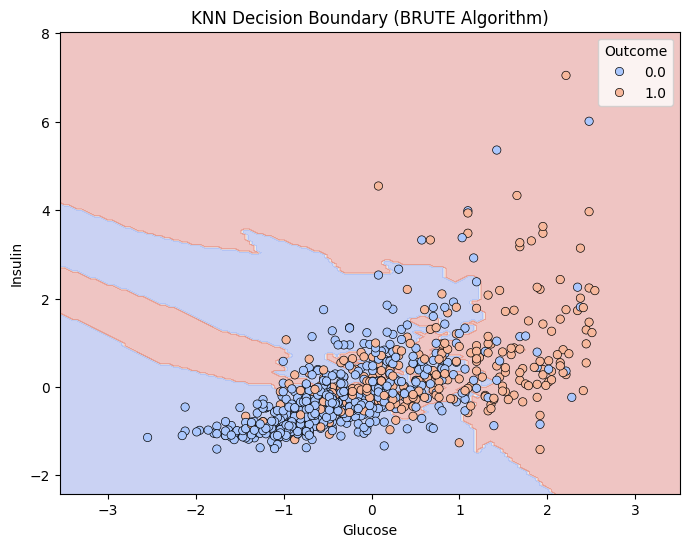

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/MasteriNeuron/datasets/refs/heads/main/diabetes.csv"
data = pd.read_csv(url)

print("Dataset shape:", data.shape)
print("Missing values (zeros):")
print((data == 0).sum())

cols_with_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[cols_with_missing] = data[cols_with_missing].replace(0, np.nan)

imputer = KNNImputer(n_neighbors=5)
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

X = data_imputed.drop("Outcome", axis=1)
y = data_imputed["Outcome"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

algorithms = ['brute', 'kd_tree', 'ball_tree']
results = []

for algo in algorithms:
    start = time.time()
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=algo)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    end = time.time()

    acc = accuracy_score(y_test, y_pred)
    results.append({'Algorithm': algo, 'Accuracy': acc, 'Training Time (s)': end - start})

results_df = pd.DataFrame(results)
print("\n=== Algorithm Comparison ===")
print(results_df)

best_algo = results_df.sort_values(by='Accuracy', ascending=False).iloc[0]['Algorithm']
print(f"\nBest Performing Algorithm: {best_algo}")

corr = data_imputed.corr()['Outcome'].drop('Outcome').abs().sort_values(ascending=False)
top_features = corr.index[:2].tolist()

print(f"Top 2 features used for visualization: {top_features}")

X_vis = data_imputed[top_features]
X_vis_scaled = scaler.fit_transform(X_vis)
X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(
    X_vis_scaled, y, test_size=0.3, random_state=42, stratify=y
)

knn_best = KNeighborsClassifier(n_neighbors=5, algorithm=best_algo)
knn_best.fit(X_train_v, y_train_v)

x_min, x_max = X_vis_scaled[:, 0].min() - 1, X_vis_scaled[:, 0].max() + 1
y_min, y_max = X_vis_scaled[:, 1].min() - 1, X_vis_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))
Z = knn_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
sns.scatterplot(
    x=X_vis_scaled[:, 0], y=X_vis_scaled[:, 1],
    hue=y, palette='coolwarm', edgecolor='k'
)
plt.xlabel(top_features[0])
plt.ylabel(top_features[1])
plt.title(f"KNN Decision Boundary ({best_algo.upper()} Algorithm)")
plt.show()